In [3]:
from scipy.signal import convolve2d
import cv2
import numpy as np

def multi_convolver(image, kernel):
    
    image = convolve2d(image, kernel, 'same', boundary = 'fill',
                           fillvalue = 0)
    return image


def larger_image(lables,n = 11):
  k = np.ones((n,n))
  image1  = multi_convolver(lables, k)
  layer_bool_large = np.zeros(image1.shape)
  layer_bool_large[image1 > 0.00] = 1
  return layer_bool_large
def colorize(img):
   
    l=np.zeros((480,640,3))
    l = l.astype(np.uint8)
    stemp = l[:,:,0]
    #stemp[img == 0] = 0
    stemp[img == 1] = 128
    stemp[img == 2] = 0
    stemp[img == 3] = 160
    stemp[img == 4] = 0
    stemp[img == 9] = 255
    stemp[img == 10] = 0
    l[:,:,0] = stemp

    stemp = l[:,:,1]
   # stemp[img == 0] = 0
    stemp[img == 1] = 64
    stemp[img == 2] = 0
    stemp[img == 3] = 170
    stemp[img == 4] = 255
    stemp[img == 9] = 0
    stemp[img == 10] = 0
    l[:,:,1] = stemp

    stemp = l[:,:,2]
   # stemp[img == 0] = 0
    stemp[img == 1] = 128
    stemp[img == 2] = 0
    stemp[img == 3] = 250
    stemp[img == 4] = 0
    stemp[img == 9] = 0
    stemp[img == 10] = 255
    l[:,:,2] = stemp
    #l=np.zeros((n,n2,3))
    return l

In [4]:
import matplotlib.pyplot as plt

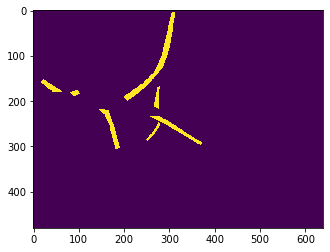

In [6]:

maskn = cv2.imread('/home/isl/pointcloudtwoimage/mask/right1649816639381.png' ,cv2.IMREAD_GRAYSCALE)
s_noise = 100
stem_noise =240
branch_noise = 100
mask = maskn.reshape(480,640)
n = 480
n2 =640

#branch layer
branchlayer_bool = np.zeros(mask.shape)
branchlayer_bool[mask == 3] = 1
plt.imshow(branchlayer_bool)

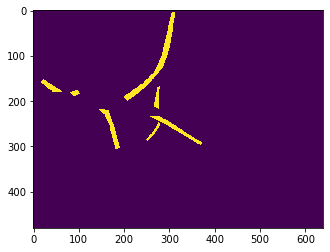

In [7]:
connectivity = 8 
branches = [] #list of branch has area > 30
branch_region  =  np.array(branchlayer_bool*255, dtype= np.uint8)
retval_branch, labels_branch, stats_branch, centroid_branch = cv2.connectedComponentsWithStats(branch_region, connectivity, cv2.CV_32S  )
Saturation_number =branch_noise #estimate through pratice

#stats_suckers at colum 4 is area
for s in range(1,len(stats_branch)):
    if stats_branch[s,4] <= Saturation_number:
      labels_branch[labels_branch == s] = 0
    else:
     branches.append((stats_branch[s,0:4],s))  
branchlayer_bool[labels_branch == 0] = 0
plt.imshow(branchlayer_bool)


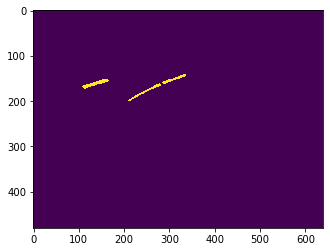

In [8]:

suckerlayer_bool = np.zeros(mask.shape)
suckerlayer_bool[mask == 4] = 1

#delete sucker noise
connectivity = 8 
sucker_region  =  np.array(suckerlayer_bool*255, dtype= np.uint8)
retval_sucker, labels_sucker, stats_sucker, centroid_suckers = cv2.connectedComponentsWithStats(sucker_region, connectivity, cv2.CV_32S  )
Saturation_number =s_noise
suckers = [] #list of sucker has area > 30
#stats_suckers at colum 4 is area
for s in range(1,len(stats_sucker)):
    if stats_sucker[s,4] <= Saturation_number:
      labels_sucker[labels_sucker == s] = 0
    else:
      suckers.append((stats_sucker[s,0:4],s))  
suckerlayer_bool[labels_sucker == 0] = 0
plt.imshow(suckerlayer_bool)

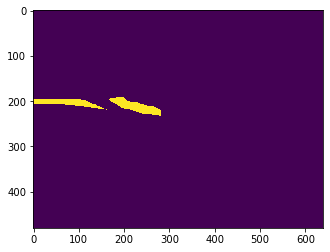

In [9]:
stemlayer_bool = np.zeros(mask.shape)
stemlayer_bool[mask == 1] = 1
connectivity = 8 
stem_region  =  np.array(stemlayer_bool*255, dtype= np.uint8)
retval_stem, labels_stem, stats_stem, centroid_stem = cv2.connectedComponentsWithStats(stem_region, connectivity, cv2.CV_32S  )
Saturation_number = stem_noise
# stems = [] #list of stem has area > 60
#stats_stem at colum 4 is area
for s in range(1,len(stats_stem)):
    if stats_stem[s,4] <= Saturation_number:
      labels_stem[labels_stem == s] = 0
#    else:
#      stems.append((stats_stem[s,0:4],s))  
stemlayer_bool[labels_stem == 0] = 0
plt.imshow(stemlayer_bool)

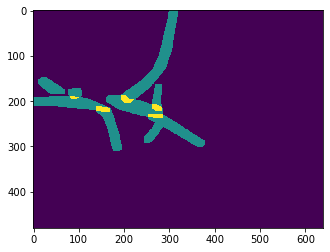

In [10]:

#----------------- enlarge stem and branch each layer
branchlayer_bool_large = larger_image (branchlayer_bool)
stemlayer_bool_large = larger_image(stemlayer_bool)

merge_b_s_f = branchlayer_bool_large + stemlayer_bool_large 
plt.imshow(merge_b_s_f)

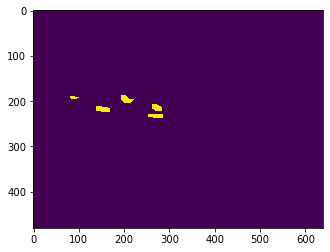

In [11]:
#find intersection

intersection_bool = np.zeros((n,n2))
intersection_bool[merge_b_s_f == 2] = 1
plt.imshow(intersection_bool)

In [12]:

#seprate branche
#-----------------
n_branch = len(branches)
list_branches = np.zeros((n_branch,n,n2,1))
for i in range(0,n_branch):
  branch=branches[i]
  l_branch = np.zeros((n,n2,1))
#   true_branch = np.zeros((n,n2,1))
  l_branch[labels_branch == branch[1]] = 1  #forklayer get value 1
#   true_sucker= merge_b_s_f + l_branch
  # if true_sucker.max() == 4: # only forklayer have intersection area
  list_branches[i,:,:] = l_branch

print('nbranhce',n_branch )


nbranhce 7


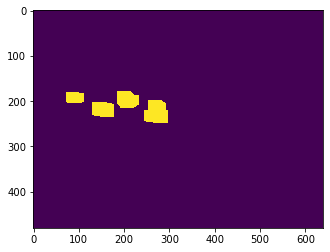

In [27]:
intersection_layer_large = larger_image(intersection_bool,20) #make intersection region bigger
plt.imshow(intersection_layer_large)

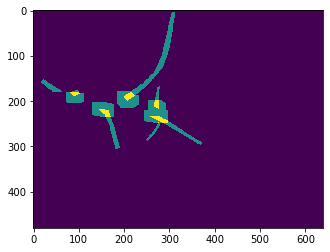

In [26]:
intersection_layer_large = larger_image(intersection_bool,20) #make intersection region bigger
# intersection_layer_large = intersection_layer_large.reshape((n,n2,1))
intersection_bool_final = np.zeros((n,n2))
sum_layer = intersection_layer_large + branchlayer_bool
plt.imshow(sum_layer)

removed  branch  1
removed  branch  6


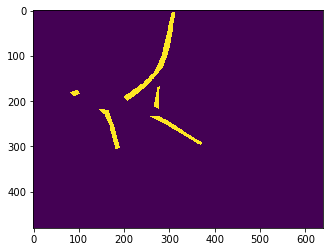

In [13]:
 #---------
intersection_layer_large = larger_image(intersection_bool,20) #make intersection region bigger
intersection_bool_final = np.zeros((n,n2,1))
for j in range(0,n_branch):
    branch_layer = list_branches[j,:,:]
    

    intersection_layer_large = intersection_layer_large.reshape((n,n2,1))
    sum_layer = intersection_layer_large + branch_layer
    # if(j == 6):
    #     plt.imshow(sum_layer)

    if np.count_nonzero(sum_layer==2)< 30:
        print("removed  branch ", j)
        branch_layer[branch_layer == 1] = 0
        list_branches[j,:,:] = branch_layer
    else:
        intersection_bool_final[sum_layer == 2] = 1
    
branch_bool = np.zeros((n,n2))
for j in range(0,n_branch):
    branch_bool = branch_bool + list_branches[j,:,:].reshape(n,n2)

plt.imshow(branch_bool)

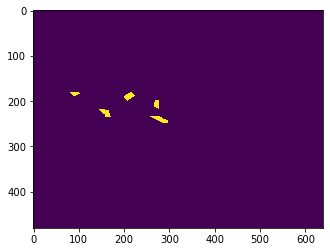

In [24]:
plt.imshow(intersection_bool_final.reshape(480,640))

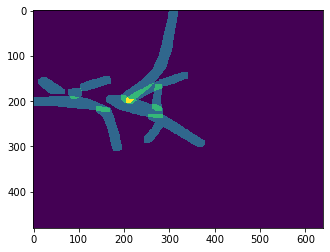

In [15]:
#find intersection sucker branch stem
#----------------- enlarge stem and branch each layer
suckerlayer_bool_large = larger_image (suckerlayer_bool)

merge_sucker = branchlayer_bool_large + stemlayer_bool_large +suckerlayer_bool_large
plt.imshow(merge_sucker)

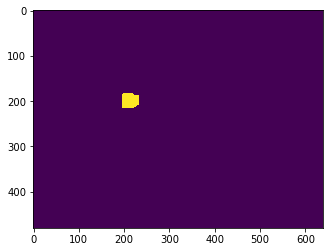

In [16]:
#find intersection

s_intersection_bool = np.zeros((n,n2))
s_intersection_bool[merge_sucker == 3] = 1

s_intersection_bool = larger_image(s_intersection_bool,20) #make intersection region bigger
plt.imshow(s_intersection_bool)

In [17]:
#separate s_itersection
connectivity = 8 
s_intersection_region  =  np.array(s_intersection_bool*255, dtype= np.uint8)
retval_intersection, labels_intersection, stats_intersection, centroid_intersection = cv2.connectedComponentsWithStats(s_intersection_region, connectivity, cv2.CV_32S  )
Saturation_number =10
intersections = [] #list of intersection has area > 60
#stats_intersection at colum 4 is area
for s in range(1,len(stats_intersection)):
    if stats_intersection[s,4] <= Saturation_number:
      labels_intersection[labels_intersection == s] = 0
    else:
      intersections.append((stats_intersection[s,0:4],s))  

n_intersection = len(intersections)
list_intersections = np.zeros((n_intersection,n,n2,1))
for i in range(0,n_intersection):
  intersection = intersections[i]
  l_intersection = np.zeros((n,n2,1))
  l_intersection[labels_intersection == intersection[1]] = 1  #forklayer get value 1
  list_intersections[i,:,:] = l_intersection

In [18]:
#-----------------separate suckers
n_sucker = len(suckers)
list_suckers = np.zeros((n_sucker,n,n2,1))
for i in range(0,n_sucker):
  sucker=suckers[i]
  l_sucker = np.zeros((n,n2,1))
  l_sucker[labels_sucker == sucker[1]] = 1  #forklayer get value 1
  # if true_sucker.max() == 4: # only forklayer have intersection area
  list_suckers[i,:,:] = l_sucker




loi3
loi3


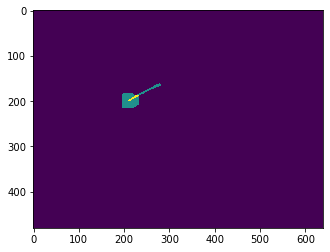

In [20]:
#----------
sucker_found = np.zeros((n_sucker))
intersection_found = np.zeros((n_intersection))
list_suckers_intersection = np.zeros((n_sucker,n,n2,1))
for i in range(0,n_intersection):
  intersection_layer = list_intersections[i,:,:,0]
  
  #---------
  for j in range(0,n_sucker):
    sucker_layer = list_suckers[j,:,:]
    intersection_layer_large = intersection_layer #cause bigger before
    
    intersection_layer_large = intersection_layer_large.reshape((n,n2,1))
    sum_layer = intersection_layer_large + sucker_layer
   
    #plt.imshow(sum_layer[:,:,0])
    
    if np.count_nonzero(sum_layer==2)> 0:
      cut_region = np.zeros((n,n2,1))
    #  print('timthay')
    #  print('suckerfound',sucker_found[j])
    #  print('intersection found',intersection_found[i])
      sucker_found[j] = sucker_found[j] + 1
      intersection_found[i] = intersection_found[i] + 1
   #   print('suckerfound',sucker_found[j])
    #  print('intersection found',intersection_found[i])
      if(sucker_found[j] == 1 and intersection_found[i]==1): #only one sucker on intersection is valid
    #    print('tim valid')
        cut_region[sum_layer == 2] = 1 #set value for intersection or cutregion
      list_suckers_intersection[j,:,:] = cut_region
      plt.imshow(sum_layer.reshape(480,640))
    else:
      print('loi3')


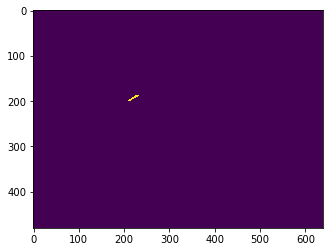

In [22]:
sucker_intersection_final = np.zeros((n,n2,1))
for j in range(0,n_sucker):
    sucker_intersection_final = sucker_intersection_final + list_suckers_intersection[j,:,:]

plt.imshow(sucker_intersection_final.reshape(480,640))

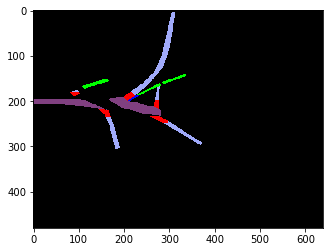

In [23]:
intersection_bool_final = intersection_bool_final.reshape(n,n2)
sucker_intersection_final = sucker_intersection_final.reshape(n,n2)
mask = np.zeros((n,n2))
mask[branch_bool == 1] = 3
mask[stemlayer_bool == 1] = 1
mask[suckerlayer_bool == 1] = 4
mask[intersection_bool_final == 1] = 9
mask[sucker_intersection_final == 1] = 10
img = colorize(mask)
plt.imshow(img)